In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
hdfc_df=pd.read_csv("C:/KM/Datasets/Nifty50 Datasets/HDFC.csv",parse_dates=['Date'],index_col=['Date'])
hdfc_df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.0,2440395.0,0.6232
2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.0,1815110.0,0.5327


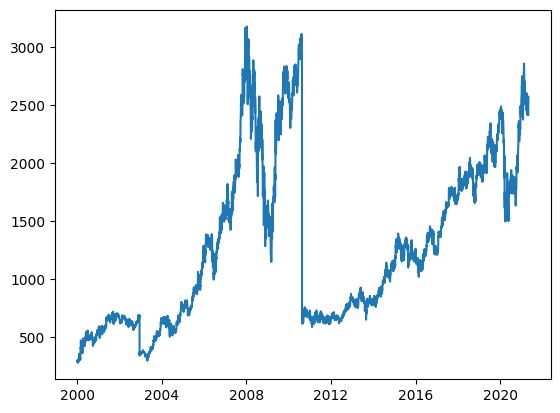

In [3]:
fig,ax=plt.subplots()
ax.plot(hdfc_df.index,hdfc_df['Close'])

In [4]:
hdfc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              5306 non-null   object 
 1   Series              5306 non-null   object 
 2   Prev Close          5306 non-null   float64
 3   Open                5306 non-null   float64
 4   High                5306 non-null   float64
 5   Low                 5306 non-null   float64
 6   Last                5306 non-null   float64
 7   Close               5306 non-null   float64
 8   VWAP                5306 non-null   float64
 9   Volume              5306 non-null   int64  
 10  Turnover            5306 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  4797 non-null   float64
 13  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 621.8+ KB


In [5]:
timesteps=hdfc_df.index.to_numpy()
prices=hdfc_df['Close'].to_numpy()

In [6]:
split_1=int(len(prices)*0.8)
x1,y1=timesteps[:split_1],prices[:split_1]
x2,y2=timesteps[split_1:],prices[split_1:]
x1,y1

(array(['2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000',
        '2000-01-05T00:00:00.000000000', ...,
        '2017-01-10T00:00:00.000000000', '2017-01-11T00:00:00.000000000',
        '2017-01-12T00:00:00.000000000'],
       shape=(4244,), dtype='datetime64[ns]'),
 array([ 293.5 ,  304.05,  292.8 , ..., 1217.25, 1230.05, 1221.1 ],
       shape=(4244,)))

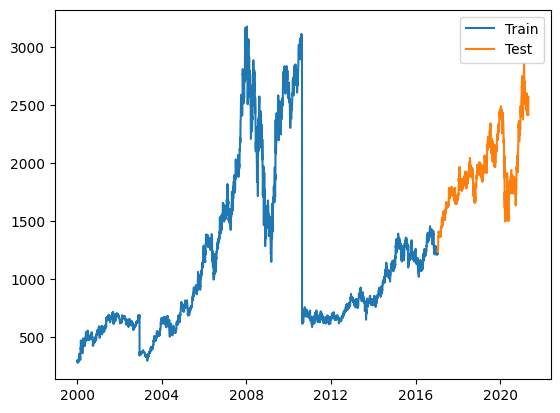

In [7]:
fig,ax=plt.subplots()
ax.plot(x1,y1)
ax.plot(x2,y2)
ax.legend(['Train','Test'])

In [8]:
def mean_absolute_scaled_error(y_true,y_pred):
    y_true=tf.convert_to_tensor(y_true)
    y_pred=tf.convert_to_tensor(y_pred)
    mae=tf.reduce_mean(tf.abs(y_true-y_pred))
    mae_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
    mase=mae/mae_no_season
    return mase

In [9]:
naive_forecast=y2[:-1]
y2[-10:],naive_forecast[-10:]

(array([2574.05, 2492.35, 2415.9 , 2479.7 , 2497.35, 2509.8 , 2518.4 ,
        2577.  , 2538.85, 2420.1 ]),
 array([2547.15, 2574.05, 2492.35, 2415.9 , 2479.7 , 2497.35, 2509.8 ,
        2518.4 , 2577.  , 2538.85]))

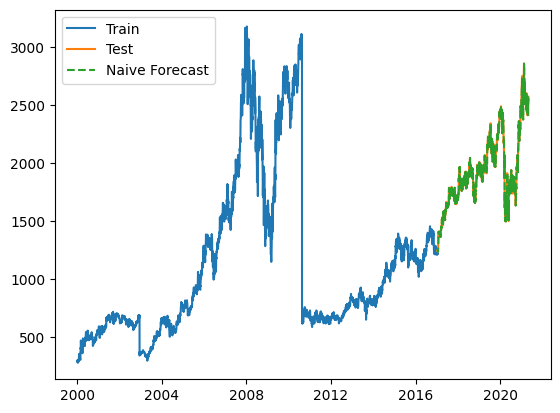

In [10]:
fig,ax=plt.subplots()
ax.plot(x1,y1)
ax.plot(x2,y2)
ax.plot(x2[1:],naive_forecast,linestyle='--')
ax.legend(['Train','Test','Naive Forecast'])

In [11]:
def evaluate_metrics(y_true,y_pred):
    y_true=tf.cast(y_true,dtype=tf.float32)
    y_pred=tf.cast(y_pred,dtype=tf.float32)
    mae=tf.keras.metrics.mae(y_true,y_pred)
    rmse=tf.sqrt(tf.keras.metrics.mse(y_true,y_pred))
    mape=tf.keras.metrics.mape(y_true,y_pred)
    mase=mean_absolute_scaled_error(y_true,y_pred)
    return {'MAE':mae.numpy(),'RMSE':rmse.numpy(),'MAPE':mape.numpy(),'MASE':mase.numpy()}

In [12]:
naive_results=evaluate_metrics(y_true=y2[1:],y_pred=naive_forecast)
naive_results

{'MAE': np.float32(26.084446),
 'RMSE': np.float32(38.54278),
 'MAPE': np.float32(1.3411412),
 'MASE': np.float32(0.99939704)}

In [13]:
def get_labelled_window(x,horizon):
    return x[:,:-horizon],x[:,-horizon:]

In [14]:
def make_windows(x,horizon,window):
    window_step=tf.expand_dims(np.arange(window+horizon),axis=0)
    window_indexes=window_step+np.expand_dims(np.arange(len(x)-(horizon+window-1)),axis=0).T
    windowed_array=x[window_indexes]
    windows,labels=get_labelled_window(windowed_array,horizon)
    return windows,labels

In [15]:
full_windows,full_labels=make_windows(prices,window=7,horizon=1)
full_windows,full_labels

(array([[ 293.5 ,  304.05,  292.8 , ...,  286.55,  287.2 ,  283.85],
        [ 304.05,  292.8 ,  296.45, ...,  287.2 ,  283.85,  285.6 ],
        [ 292.8 ,  296.45,  286.55, ...,  283.85,  285.6 ,  283.85],
        ...,
        [2574.05, 2492.35, 2415.9 , ..., 2497.35, 2509.8 , 2518.4 ],
        [2492.35, 2415.9 , 2479.7 , ..., 2509.8 , 2518.4 , 2577.  ],
        [2415.9 , 2479.7 , 2497.35, ..., 2518.4 , 2577.  , 2538.85]],
       shape=(5299, 7)),
 array([[ 285.6 ],
        [ 283.85],
        [ 286.55],
        ...,
        [2577.  ],
        [2538.85],
        [2420.1 ]], shape=(5299, 1)))

In [16]:
def split_windowS(window,label,test_split):
    split_2=int(len(window)*(1-test_split))
    train_window,train_label=window[:split_2,:],label[:split_2]
    test_window,test_label=window[split_2:,:],label[split_2:]
    return train_window,train_label,test_window,test_label

In [17]:
train_windows,train_labels,test_windows,test_labels=split_windowS(window=full_windows,label=full_labels,test_split=0.2)

In [51]:
from tensorflow.keras.layers import Input,Dense,LSTM,Conv1D,Lambda,GRU,Bidirectional
from tensorflow.keras.losses import mae
from tensorflow.keras.optimizers import Adam

In [19]:
model_1=tf.keras.Sequential([
    Dense(128,activation='relu'),
    Dense(1)
])
model_1.compile(loss=mae,optimizer=Adam(),metrics=['mae'])
model_1.fit(train_windows,train_labels,epochs=100,batch_size=128,validation_data=(test_windows,test_labels))

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 265.1339 - mae: 265.1339 - val_loss: 35.5797 - val_mae: 35.5797
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.1652 - mae: 33.1652 - val_loss: 41.2942 - val_mae: 41.2942
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.5344 - mae: 27.5344 - val_loss: 33.5777 - val_mae: 33.5777
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.8455 - mae: 26.8455 - val_loss: 32.2497 - val_mae: 32.2497
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.9579 - mae: 25.9579 - val_loss: 31.8370 - val_mae: 31.8370
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.0348 - mae: 26.0348 - val_loss: 36.1117 - val_mae: 36.1117
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.4915 - mae: 25.4915 - val_loss: 31.1488 - val_mae: 31.1488
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.7921 - mae: 26.7921 - val_loss: 31.2872 - val_mae: 31.2872
Epoch 9/100
34/34 ━━━━━━━━━━━━

In [20]:
def model_preds(model,input_data):
    preds=model.predict(input_data)
    return tf.squeeze(preds)

In [21]:
model_1_preds=model_preds(model_1,test_windows)
model_1_preds.shape,test_labels.shape

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step


(TensorShape([1060]), (1060, 1))

In [22]:
model_1_results=evaluate_metrics(y_true=tf.squeeze(test_labels),y_pred=model_1_preds)
model_1_results

{'MAE': np.float32(27.046001),
 'RMSE': np.float32(39.359726),
 'MAPE': np.float32(1.3934349),
 'MASE': np.float32(1.0356759)}

In [23]:
full_30_windows,full_30_labels=make_windows(prices,window=30,horizon=1)

In [24]:
train_30_windows,train_30_labels,test_30_windows,test_30_labels=split_windowS(full_30_windows,full_30_labels,test_split=0.2)

In [25]:
model_2=tf.keras.Sequential([
    Dense(128,activation='relu'),
    Dense(1)
])
model_2.compile(loss=mae,optimizer=Adam(),metrics=['mae'])
model_2.fit(train_30_windows,train_30_labels,epochs=100,batch_size=128,validation_data=(test_30_windows,test_30_labels))

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 247.5218 - mae: 247.5218 - val_loss: 61.0051 - val_mae: 61.0051
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.7233 - mae: 44.7233 - val_loss: 49.3718 - val_mae: 49.3718
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.1058 - mae: 37.1058 - val_loss: 41.0790 - val_mae: 41.0790
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.8820 - mae: 34.8820 - val_loss: 37.9821 - val_mae: 37.9821
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.5859 - mae: 34.5859 - val_loss: 83.6452 - val_mae: 83.6452
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.3811 - mae: 40.3811 - val_loss: 71.2839 - val_mae: 71.2839
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.3725 - mae: 34.3725 - val_loss: 41.2789 - val_mae: 41.2789
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.9863 - mae: 29.9863 - val_loss: 37.1765 - val_mae: 37.1765
Epoch 9/100
33/33 ━━━━━━━━━━━━

In [26]:
model_2_preds=model_preds(model_2,test_30_windows)
model_2_results=evaluate_metrics(y_true=tf.squeeze(test_30_labels),y_pred=model_2_preds)
model_2_results

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step


{'MAE': np.float32(27.417627),
 'RMSE': np.float32(40.192566),
 'MAPE': np.float32(1.4121901),
 'MASE': np.float32(1.0473592)}

In [27]:
model_3=tf.keras.Sequential([
    Lambda(lambda x: tf.expand_dims(x,axis=1)),
    LSTM(128,activation='relu',return_sequences=True),
    LSTM(128,activation='relu'),
    Dense(1)
])
model_3.compile(loss=mae,optimizer=Adam(),metrics=['mae'])
model_3.fit(train_windows,train_labels,epochs=100,batch_size=128,validation_data=(test_windows,test_labels))

Epoch 1/100

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 930.5977 - mae: 930.5977 - val_loss: 984.3317 - val_mae: 984.3317
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 181.5454 - mae: 181.5454 - val_loss: 44.6681 - val_mae: 44.6681
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.6621 - mae: 39.6621 - val_loss: 43.9762 - val_mae: 43.9762
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.8981 - mae: 35.8981 - val_loss: 46.5521 - val_mae: 46.5521
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.8005 - mae: 35.8005 - val_loss: 42.7476 - val_mae: 42.7476
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.2716 - mae: 35.2716 - val_loss: 42.1714 - val_mae: 42.1714
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.9148 - mae: 34.9148 - val_loss: 44.8535 - val_mae: 44.8535
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.5136 - mae: 34.5136 - val_loss: 44.2158 - val_mae: 44.2158
Epoch 9/100
34/34 ━━━━━━

In [28]:
model_3_preds=model_preds(model_3,test_windows)
model_3_results=evaluate_metrics(y_true=tf.squeeze(test_labels),y_pred=model_3_preds)
model_3_results

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


{'MAE': np.float32(28.40893),
 'RMSE': np.float32(41.16332),
 'MAPE': np.float32(1.4668124),
 'MASE': np.float32(1.0878667)}

In [29]:
hdfc_price_df=pd.DataFrame({'Close':hdfc_df['Close'],'VWAP':hdfc_df['VWAP']},index=hdfc_df.index)
hdfc_price_df

,Close,VWAP
Date,,
2000-01-03,293.50,293.50
2000-01-04,304.05,303.62
2000-01-05,292.80,294.53
2000-01-06,296.45,300.14
2000-01-07,286.55,288.80
...,...,...
2021-04-26,2509.80,2508.07
2021-04-27,2518.40,2509.18
2021-04-28,2577.00,2574.21


In [30]:
hdfc_windowed_df=hdfc_price_df.copy()
for i in range(7):
    hdfc_windowed_df[f'Close {i+1}']=hdfc_price_df['Close'].shift(periods=i+1)
    hdfc_windowed_df[f'VWAP {i+1}']=hdfc_price_df['VWAP'].shift(periods=i+1)
hdfc_windowed_df    

,Close,VWAP,Close 1,VWAP 1,Close 2,VWAP 2,Close 3,VWAP 3,Close 4,VWAP 4,Close 5,VWAP 5,Close 6,VWAP 6,Close 7,VWAP 7
Date,,,,,,,,,,,,,,,,
2000-01-03,293.50,293.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,304.05,303.62,293.50,293.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,292.80,294.53,304.05,303.62,293.50,293.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,296.45,300.14,292.80,294.53,304.05,303.62,293.50,293.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,286.55,288.80,296.45,300.14,292.80,294.53,304.05,303.62,293.50,293.50,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2509.80,2508.07,2497.35,2479.65,2479.70,2437.46,2415.90,2454.68,2492.35,2484.26,2574.05,2572.39,2547.15,2527.23,2512.95,2468.59
2021-04-27,2518.40,2509.18,2509.80,2508.07,2497.35,2479.65,2479.70,2437.46,2415.90,2454.68,2492.35,2484.26,2574.05,2572.39,2547.15,2527.23
2021-04-28,2577.00,2574.21,2518.40,2509.18,2509.80,2508.07,2497.35,2479.65,2479.70,2437.46,2415.90,2454.68,2492.35,2484.26,2574.05,2572.39


In [31]:
hdfc_windowed_df=hdfc_windowed_df.dropna()
hdfc_windowed_df

,Close,VWAP,Close 1,VWAP 1,Close 2,VWAP 2,Close 3,VWAP 3,Close 4,VWAP 4,Close 5,VWAP 5,Close 6,VWAP 6,Close 7,VWAP 7
Date,,,,,,,,,,,,,,,,
2000-01-12,285.60,287.60,283.85,284.54,287.20,289.42,286.55,288.80,296.45,300.14,292.80,294.53,304.05,303.62,293.50,293.50
2000-01-13,283.85,285.84,285.60,287.60,283.85,284.54,287.20,289.42,286.55,288.80,296.45,300.14,292.80,294.53,304.05,303.62
2000-01-14,286.55,283.60,283.85,285.84,285.60,287.60,283.85,284.54,287.20,289.42,286.55,288.80,296.45,300.14,292.80,294.53
2000-01-17,302.20,302.87,286.55,283.60,283.85,285.84,285.60,287.60,283.85,284.54,287.20,289.42,286.55,288.80,296.45,300.14
2000-01-18,305.75,308.57,302.20,302.87,286.55,283.60,283.85,285.84,285.60,287.60,283.85,284.54,287.20,289.42,286.55,288.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2509.80,2508.07,2497.35,2479.65,2479.70,2437.46,2415.90,2454.68,2492.35,2484.26,2574.05,2572.39,2547.15,2527.23,2512.95,2468.59
2021-04-27,2518.40,2509.18,2509.80,2508.07,2497.35,2479.65,2479.70,2437.46,2415.90,2454.68,2492.35,2484.26,2574.05,2572.39,2547.15,2527.23
2021-04-28,2577.00,2574.21,2518.40,2509.18,2509.80,2508.07,2497.35,2479.65,2479.70,2437.46,2415.90,2454.68,2492.35,2484.26,2574.05,2572.39


In [33]:
hdfc_windowed_df.columns

Index(['Close', 'VWAP', 'Close 1', 'VWAP 1', 'Close 2', 'VWAP 2', 'Close 3',
       'VWAP 3', 'Close 4', 'VWAP 4', 'Close 5', 'VWAP 5', 'Close 6', 'VWAP 6',
       'Close 7', 'VWAP 7'],
      dtype='object')

In [34]:
input_df=hdfc_windowed_df[['Close 1', 'VWAP 1', 'Close 2', 'VWAP 2', 'Close 3',
       'VWAP 3', 'Close 4', 'VWAP 4', 'Close 5', 'VWAP 5', 'Close 6', 'VWAP 6',
       'Close 7', 'VWAP 7']]
target_col=hdfc_windowed_df['Close']


In [35]:
split_3=int(len(hdfc_windowed_df['VWAP'])*0.8)
train_inputs,train_target=input_df.iloc[:split_3,:],target_col[:split_3]
test_inputs,test_target=input_df.iloc[split_3:,:],target_col[split_3:]

In [36]:
model_4=tf.keras.Sequential([
    Dense(128,activation='relu'),
    Dense(1)
])
model_4.compile(loss=mae,optimizer=Adam(),metrics=['mae'])
model_4.fit(train_inputs,train_target,epochs=100,batch_size=128,validation_data=(test_inputs,test_target))

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 130.2557 - mae: 130.2557 - val_loss: 50.8970 - val_mae: 50.8970
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42.2121 - mae: 42.2121 - val_loss: 48.6395 - val_mae: 48.6395
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39.9335 - mae: 39.9335 - val_loss: 46.1050 - val_mae: 46.1050
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.0665 - mae: 38.0665 - val_loss: 56.2324 - val_mae: 56.2324
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.4516 - mae: 36.4516 - val_loss: 52.3851 - val_mae: 52.3851
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.5060 - mae: 35.5060 - val_loss: 50.3221 - val_mae: 50.3221
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.0244 - mae: 35.0244 - val_loss: 49.8651 - val_mae: 49.8651
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.9814 - mae: 31.9814 - val_loss: 39.1382 - val_mae: 39.1382
Epoch 9/100
34/34 ━━━━━━━━━━━━

In [37]:
model_4_preds=model_preds(model_4,test_inputs)
model_4_results=evaluate_metrics(y_true=tf.squeeze(test_target),y_pred=model_4_preds)
model_4_results

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step


{'MAE': np.float32(31.166609),
 'RMSE': np.float32(43.2135),
 'MAPE': np.float32(1.61347),
 'MASE': np.float32(1.1934668)}

In [60]:
model_5=tf.keras.Sequential([
    Lambda(lambda x: tf.expand_dims(x,axis=1)),
    LSTM(128,activation='relu',return_sequences=True),
    LSTM(128,activation='relu',return_sequences=True),
    LSTM(192,activation='relu'),
    Dense(1)
])
model_5.compile(loss=mae,optimizer=Adam(),metrics=['mae'])
model_5.fit(train_inputs,train_target,epochs=100,batch_size=128,validation_data=(test_inputs,test_target))

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 708.8805 - mae: 708.8805 - val_loss: 179.6454 - val_mae: 179.6454
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 60.9142 - mae: 60.9142 - val_loss: 61.0267 - val_mae: 61.0267
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.0422 - mae: 36.0422 - val_loss: 42.0312 - val_mae: 42.0312
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.9226 - mae: 35.9226 - val_loss: 62.9451 - val_mae: 62.9451
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.4728 - mae: 36.4728 - val_loss: 40.5350 - val_mae: 40.5350
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.3079 - mae: 32.3079 - val_loss: 40.1876 - val_mae: 40.1876
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31.7886 - mae: 31.7886 - val_loss: 41.0256 - val_mae: 41.0256
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31.4190 - mae: 31.4190 - val_loss: 50.4407 - val_mae: 50.4407
Epoch 9/100
34/34 ━━━━━━━━━

In [61]:
model_5_preds=model_preds(model_5,test_inputs)
model_5_results=evaluate_metrics(y_true=tf.squeeze(test_target),y_pred=model_5_preds)
model_5_results

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


{'MAE': np.float32(26.765009),
 'RMSE': np.float32(39.3721),
 'MAPE': np.float32(1.3751103),
 'MASE': np.float32(1.0249158)}

In [62]:
model_6=tf.keras.Sequential([
    Lambda(lambda x: tf.expand_dims(x,axis=1)),
    GRU(128,activation='relu',return_sequences=True),
    GRU(192,activation='relu', return_sequences=True),
    GRU(256,activation='relu'),
    Dense(1)
])
model_6.compile(loss=mae,optimizer=Adam(),metrics=['mae'])
model_6.fit(train_inputs,train_target,epochs=100,batch_size=128,validation_data=(test_inputs,test_target))

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 355.1425 - mae: 355.1425 - val_loss: 95.2228 - val_mae: 95.2228
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.4255 - mae: 38.4255 - val_loss: 54.7948 - val_mae: 54.7948
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35.1161 - mae: 35.1161 - val_loss: 40.6211 - val_mae: 40.6211
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.5071 - mae: 33.5071 - val_loss: 49.5146 - val_mae: 49.5146
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32.7006 - mae: 32.7006 - val_loss: 38.3885 - val_mae: 38.3885
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.6976 - mae: 39.6976 - val_loss: 39.9662 - val_mae: 39.9662
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31.6568 - mae: 31.6568 - val_loss: 49.7602 - val_mae: 49.7602
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.6671 - mae: 28.6671 - val_loss: 48.4687 - val_mae: 48.4687
Epoch 9/100
34/34 ━━━━━━━━━━━

In [63]:
model_6_preds=model_preds(model_6,test_inputs)
model_6_results=evaluate_metrics(y_true=tf.squeeze(test_target),y_pred=model_6_preds)
model_6_results

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


{'MAE': np.float32(26.983118),
 'RMSE': np.float32(38.97101),
 'MAPE': np.float32(1.3823708),
 'MASE': np.float32(1.0332679)}

In [66]:
model_7=tf.keras.Sequential([
    Lambda(lambda x: tf.expand_dims(x,axis=1)),
    Bidirectional(GRU(128,activation='relu',return_sequences=True)),
    Bidirectional(GRU(128,activation='relu', return_sequences=True)),
    Bidirectional(GRU(192,activation='relu')),
    Dense(1)
])
model_7.compile(loss=mae,optimizer=Adam(),metrics=['mae'])
model_7.fit(train_inputs,train_target,epochs=100,batch_size=128,validation_data=(test_inputs,test_target))

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 289.8477 - mae: 289.8477 - val_loss: 62.1429 - val_mae: 62.1429
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 36.2169 - mae: 36.2169 - val_loss: 41.4213 - val_mae: 41.4213
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33.6539 - mae: 33.6539 - val_loss: 69.2712 - val_mae: 69.2712
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33.4341 - mae: 33.4341 - val_loss: 52.0490 - val_mae: 52.0490
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34.1131 - mae: 34.1131 - val_loss: 47.6942 - val_mae: 47.6942
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30.2431 - mae: 30.2431 - val_loss: 41.9969 - val_mae: 41.9969
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28.6778 - mae: 28.6778 - val_loss: 33.4880 - val_mae: 33.4880
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31.6794 - mae: 31.6794 - val_loss: 34.5293 - val_mae: 34.5293
Epoch 9/100
34/34 ━━━━━━━━━━━

In [67]:
model_7_preds=model_preds(model_7,test_inputs)
model_7_results=evaluate_metrics(y_true=tf.squeeze(test_target),y_pred=model_7_preds)
model_7_results

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


{'MAE': np.float32(26.739931),
 'RMSE': np.float32(39.21723),
 'MAPE': np.float32(1.376162),
 'MASE': np.float32(1.0239555)}

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
# model_forest=RandomForestRegressor(n_jobs=-1,n_estimators=75,max_depth=8,random_state=42)
model_forest=LinearRegression()
model_forest.fit(train_inputs,train_target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
forest_preds=model_preds(model_forest,test_inputs)
forest_results=evaluate_metrics(y_true=test_target,y_pred=forest_preds)
forest_results

{'MAE': np.float32(26.210909),
 'RMSE': np.float32(38.178905),
 'MAPE': np.float32(1.3433927),
 'MASE': np.float32(1.0036975)}

In [73]:
from joblib import dump
dump(model_forest,'Models/linear_multi.pkl')

['Models/linear_multi.pkl']